<a href="https://www.kaggle.com/code/akanshakhandelwal08/may-tableground-1?scriptVersionId=95539890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and understanding data


In [3]:

data = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [5]:
data['f_27'].value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

Dropping the column 

In [6]:
data.drop(['f_27'],axis=1,inplace=True)

data.drop(['id'],axis=1,inplace=True)

In [7]:
data.isnull().sum()

f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

There are no null values in the dataset

## EDA

In [8]:
def numerical_plot(data,colname):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("TARGET by "+ colname)
    sns.kdeplot(data.loc[(data['target']==0),colname], color="g", label="Machine State 0",legend=True)
    sns.kdeplot(data.loc[(data['target']==1),colname],color="r", label="Machine State 1",legend=True) 
    plt.legend()
    plt.subplot(1,2,2)
    plt.title("BOXPLOT TARGET by "+ colname)
    sns.boxplot(y=colname, data=data, x="target")
    plt.show()

In [9]:
#for col in data.columns[:-1]:
    #numerical_plot(data,col)

In [10]:
X_train = data.copy()
X_test = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')
y_train = X_train.pop('target')
output= X_test.pop('id')

X_test.drop(['f_27'],axis=1,inplace=True)

#X_test.drop(['id'],axis=1,inplace=True)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


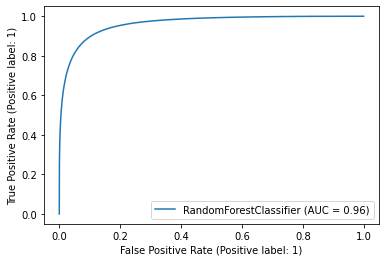

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
rf = RandomForestClassifier(n_estimators=100,max_depth=18,random_state=100, oob_score=True)
rf.fit(X_train, y_train)
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [13]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [14]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
21,f_21,0.087059
26,f_26,0.086016
29,f_30,0.070745
22,f_22,0.063821
24,f_24,0.060598
19,f_19,0.059702
25,f_25,0.057147
23,f_23,0.053418
20,f_20,0.044671
27,f_28,0.036029


In [15]:
y_pred = rf.predict_proba(X_test)
predicted = (y_pred[:,1] >= 0.4).astype('int')



In [16]:
result = pd.DataFrame({"target": predicted}, index= output)
result.index.name = "ImageId"
result.head()
output.to_csv("mysubmission.csv", index=False)